<a href="https://colab.research.google.com/github/ClarisseAlvarenga/DataScience_Comex_estudos/blob/master/Modelos_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install graphviz

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import graphviz

In [5]:
dados = pd.read_excel('/content/Amostra_clusters_risco_negativado.xlsx').set_index('ID')
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER,CLUSTER_STD,CLUSTER_NOR
ID,,,,,,,
1,15.583333,-2.72,-1.017755,False,0,4,3
2,27.052778,-2.63,-4.037228,True,3,2,0
3,15.955556,-2.57,-0.000573,True,0,4,0
4,24.477778,-3.07,-0.001145,False,3,2,3
5,24.555556,-3.18,-2.022910,True,3,2,0


In [6]:
dados.columns


Index(['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO',
       'OP_C_PAISES_EM_LISTA_REST', 'CLUSTER', 'CLUSTER_STD', 'CLUSTER_NOR'],
      dtype='object')

In [7]:
dados_classificador = dados[['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO', 'OP_C_PAISES_EM_LISTA_REST', 'CLUSTER_STD']]
dados_classificador.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER_STD
ID,,,,,
1,15.583333,-2.72,-1.017755,False,4
2,27.052778,-2.63,-4.037228,True,2
3,15.955556,-2.57,-0.000573,True,4
4,24.477778,-3.07,-0.001145,False,2
5,24.555556,-3.18,-2.022910,True,2


In [8]:
dados_classificador.describe()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,CLUSTER_STD
count,1762.000000,1762.000000,1762.000000,1762.000000
mean,17.412617,-3.023757,-2.132451,2.010783
std,6.183032,0.688946,1.702001,1.589430
min,0.363889,-7.930000,-7.227377,0.000000
25%,15.006250,-3.070000,-3.029782,0.000000
50%,15.759722,-2.830000,-2.013746,2.000000
75%,18.740972,-2.690000,-1.004009,4.000000
max,50.522222,-1.750000,0.000000,4.000000


In [9]:
#separando as variáveis do target
x = dados_classificador[['Cliente BB (anos)',	'PONTUACAO_ROC',	'NT_RISCO']]
y = dados_classificador['CLUSTER_STD']

In [10]:
#TESTE CLASSIFICADOR COM LINEAR SVC
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1321 elementos e testaremos com 441 elementos
A acurácia foi 98.87%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 29.71%


In [16]:
#modelo com Standard Scaler
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1321 elementos e testaremos com 441 elementos
A acurácia foi 99.77%


In [23]:
#modelo de árvore de decisão
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1321 elementos e testaremos com 441 elementos
A acurácia foi 99.09%


In [35]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features)
grafico = graphviz.Source(dot_data, filename="ArvoreDecisao", format="png")
grafico.render()

'ArvoreDecisao.png'

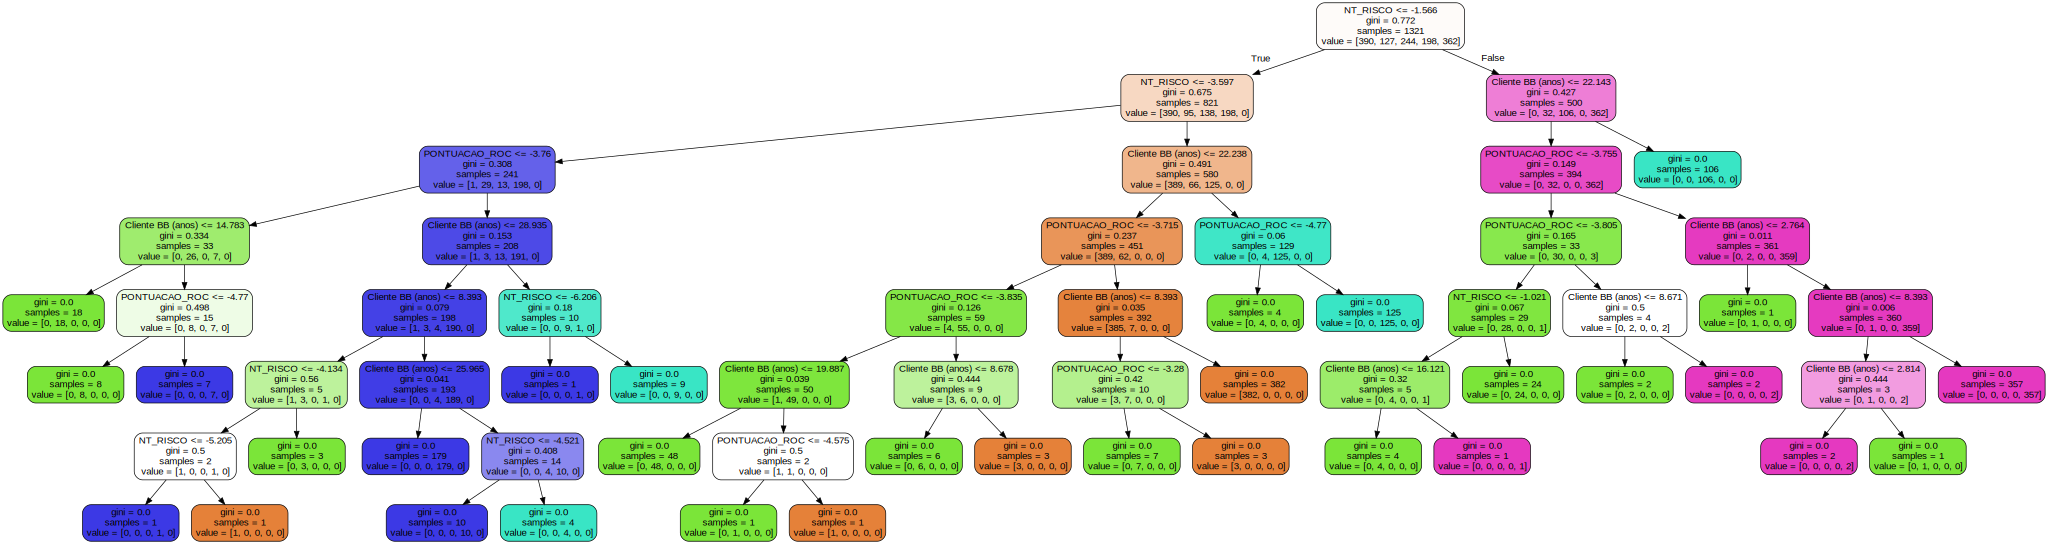

In [36]:
grafico